<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>November 18, 2016: `log` $g$ poly
<br>November 16, 2016: `expt` $g$ poly and $H$ matrix
<br>November 9, 2016: splitting from "big" notebook
</small>
</div>
</p>
<br>
<br>
<div align="center">
<b>Abstract</b><br>
Theory of matrix functions, with applications to Pascal array $\mathcal{P}$.
</div>

In [1]:
from sympy import *
from sympy.abc import n, i, N, x, lamda, phi, z, j, r, k, a, alpha, beta

init_printing()

In [2]:
%run ../../src/matrix_functions.py
%run ../../src/commons.py
%run ../../src/sequences.py

# Pascal array $\mathcal{P}$

In [5]:
m=8

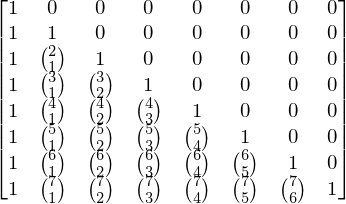

In [8]:
P_ = Matrix(m,m, lambda n,k: binomial(n, k, evaluate=k >= n or not k))
P_

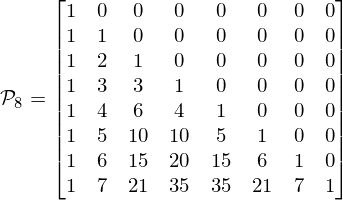

In [9]:
P =  Eq(Symbol(r'\mathcal{{P}}_{{ {} }}'.format(m)), Matrix(m,m,binomial), evaluate=False)
P

In [10]:
eigendata = spectrum(P)
eigendata

In [12]:
data, eigenvals, multiplicities = eigendata.rhs

In [13]:
Phi_poly = Phi_poly_ctor(deg=m-1)
Phi_poly

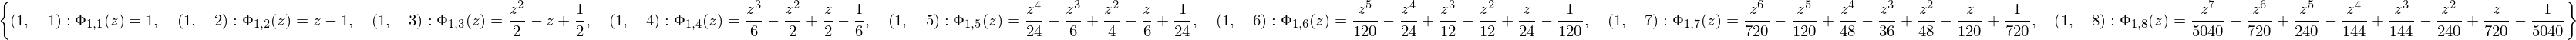

In [14]:
Phi_polynomials = component_polynomials(eigendata, early_eigenvals_subs=True)
Phi_polynomials

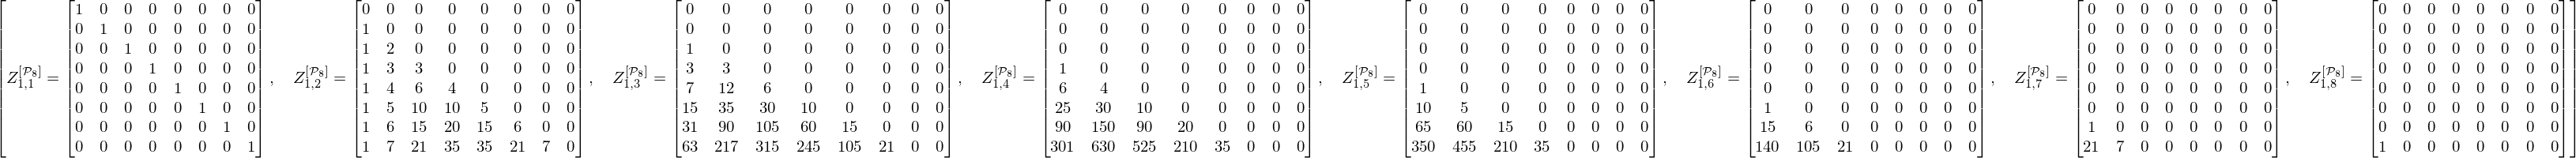

In [17]:
cmatrices = component_matrices(P, Phi_polynomials)
list(cmatrices.values())

In [18]:
a = IndexedBase('a')
aeq = Eq(a[n], n+a[n-1])
b = Function('b')
beq = Eq(b(n), n+b(n-1))

with lift_to_Lambda(aeq, return_eq=True) as aEQ, lift_to_Lambda(beq, return_eq=True) as bEQ:
    arec = aEQ(n+1)
    brec = bEQ(n+1)
    
arec, brec

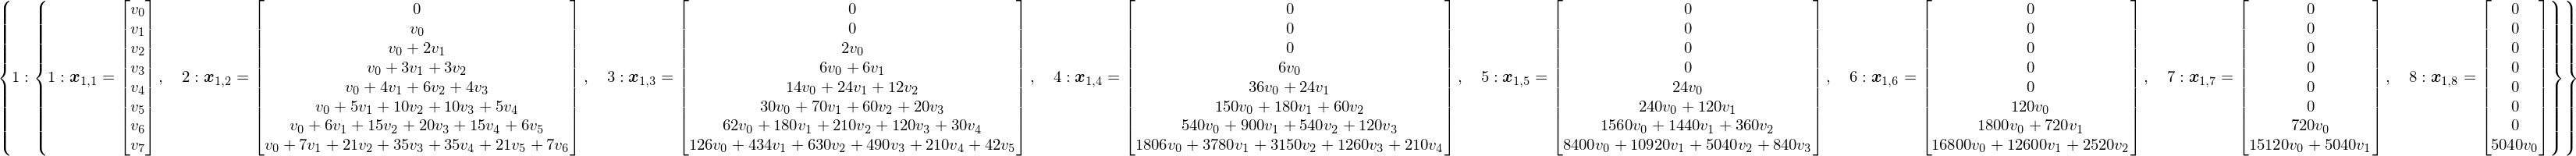

In [19]:
v = IndexedBase('v')
v_vector = Matrix(m, 1, lambda i, _: v[i])
M_space_ctor = M_space(cmatrices)
M_space_v = M_space_ctor(v_vector)
M_space_v

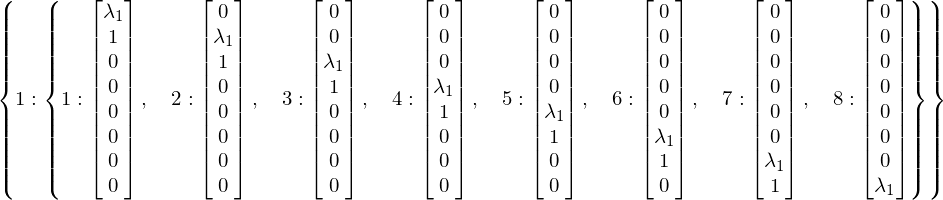

In [20]:
miniblocks = Jordan_blocks(eigendata)
miniblocks

In [21]:
miniblocks[1][1].subs(eigenvals)

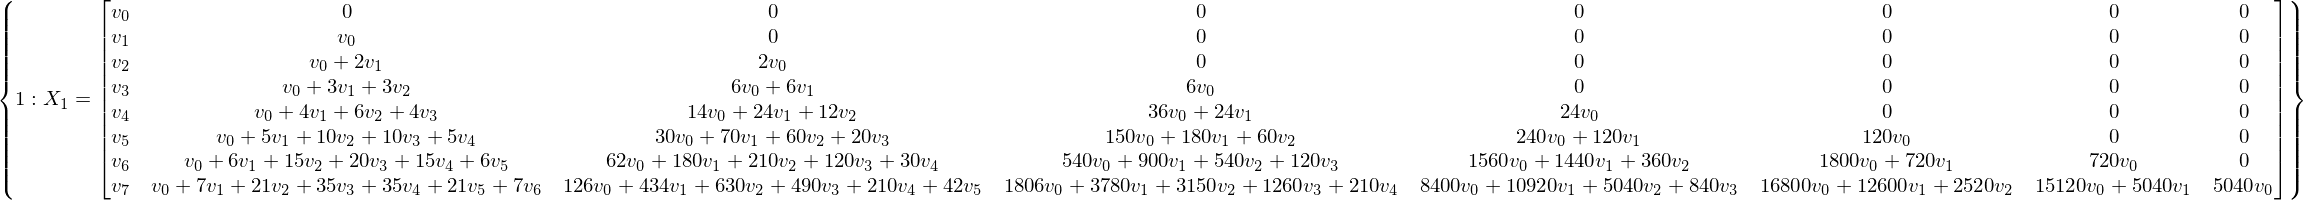

In [22]:
GEs = generalized_eigenvectors_matrices(M_space_v)
GEs

In [23]:
relations = generalized_eigenvectors_relations(eigendata)

In [24]:
eqs = relations(P, M_space_v)
eqs

AttributeError: 'BooleanFalse' object has no attribute 'lhs'

In [25]:
eqs = relations(P, M_space_v, instantiate_eigenvalues=True)
eqs

TypeError: GER() got an unexpected keyword argument 'instantiate_eigenvalues'

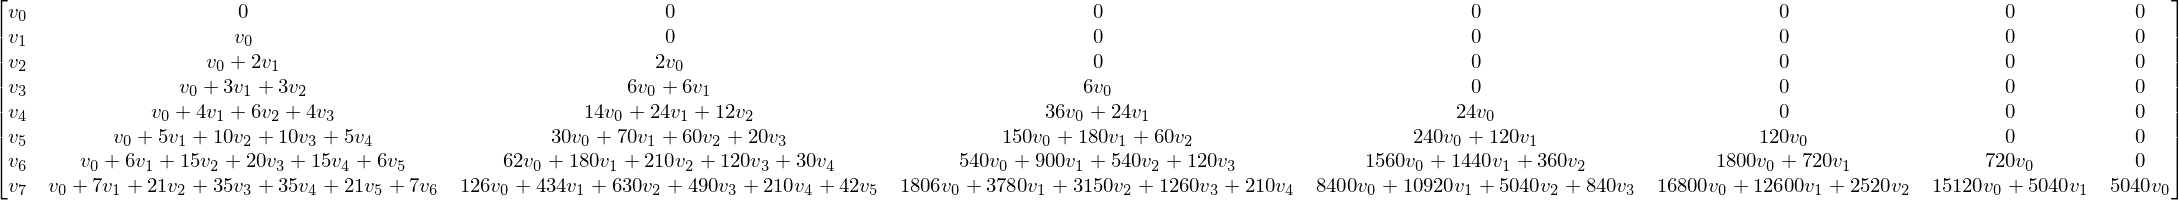

In [26]:
X_1 = GEs[1].rhs
X_1

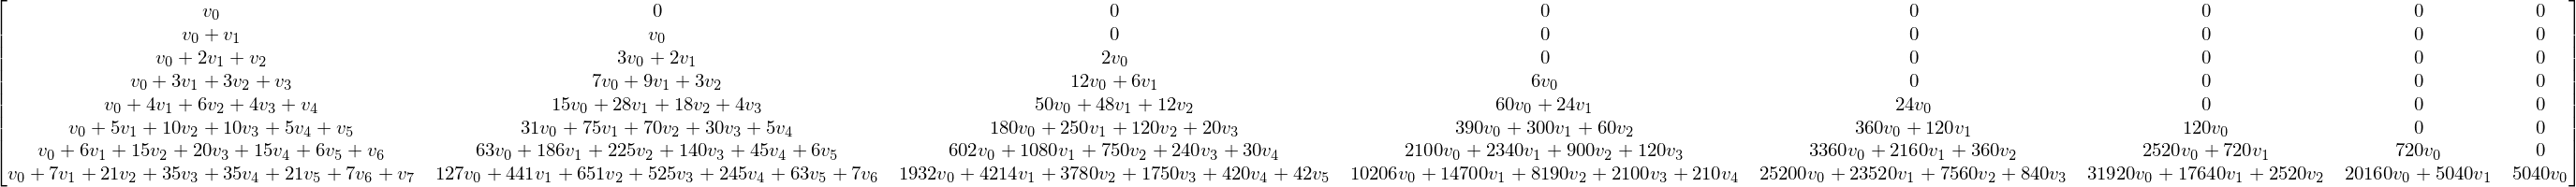

In [27]:
LHS = P * X_1
LHS

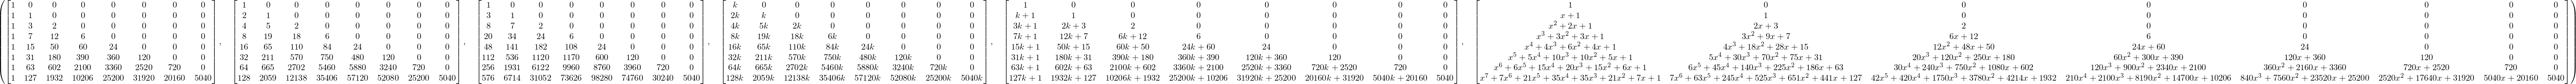

In [31]:
L = Lambda(v_vector, LHS)
L(*([1]+([0]*(m-1)))), L(*ones(m, 1)), L(*range(1, m+1)), L(*([k]*m)), L(*([1]+([k]*(m-1)))), L(*Matrix(m, 1, lambda i, _: x**i))

In [32]:
J_1 = (X_1**(-1) * P * X_1).applyfunc(simplify)

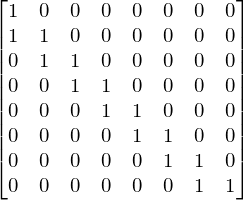

In [33]:
J_1

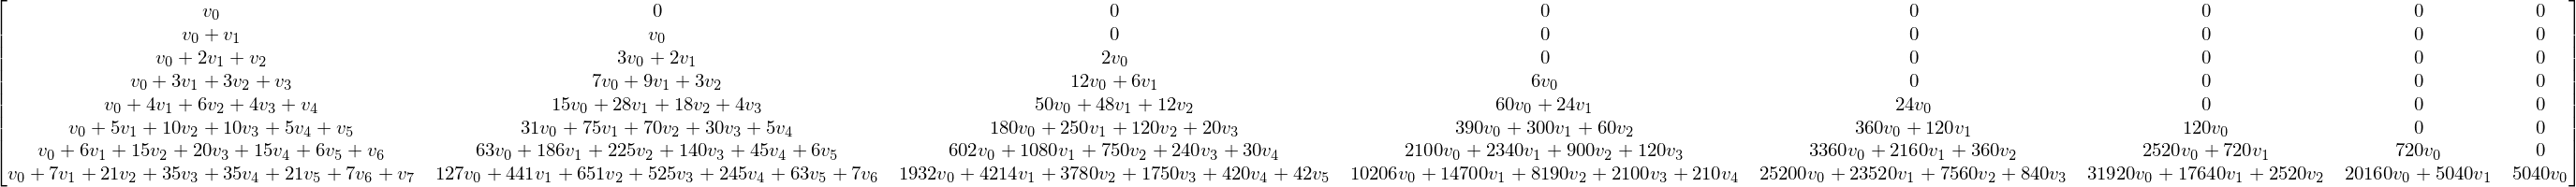

In [34]:
X_1 * J_1

In [59]:
%run ../../src/matrix_functions.py

In [35]:
X, J = Jordan_normalform(eigendata, matrices=(P, M_space_v, miniblocks))

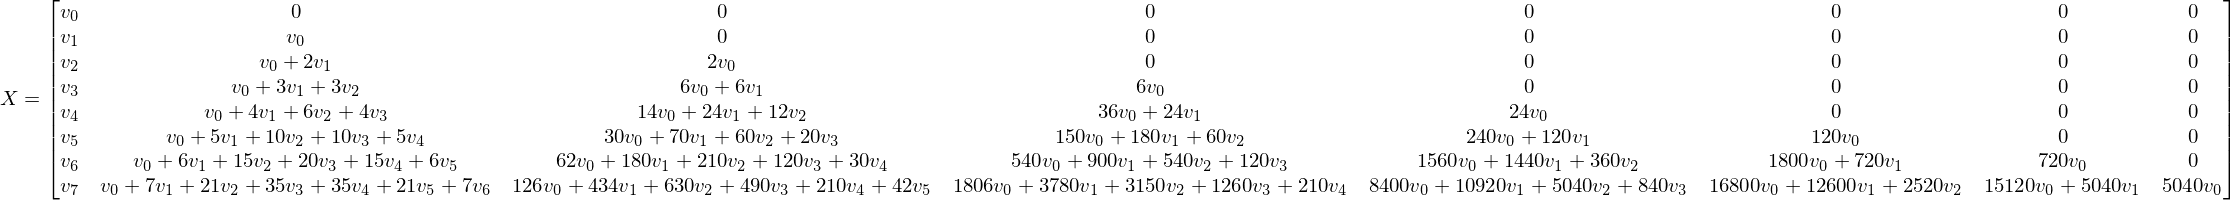

In [36]:
X

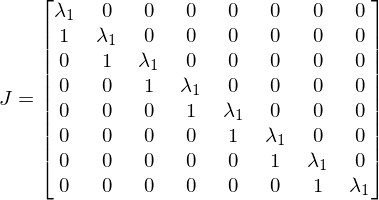

In [37]:
J

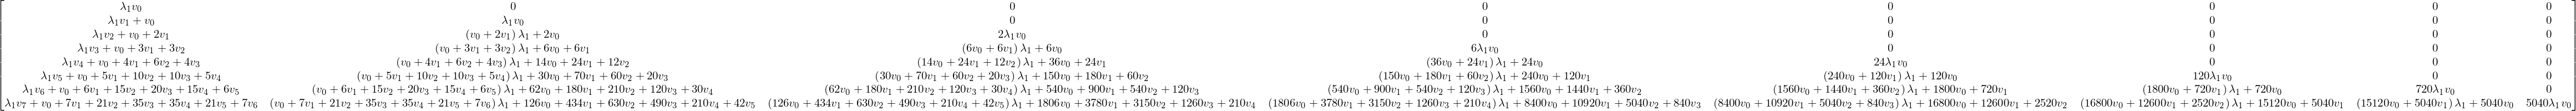

In [38]:
X.rhs * J.rhs

In [39]:
P*X.rhs == X.rhs*J.rhs.subs(eigenvals)

True

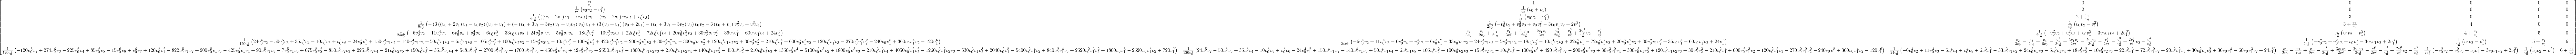

In [44]:
production_matrix(X.rhs)

## `inverse` function

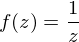

In [26]:
f, h = Function('f'), Function('h')
f_inverse = define(let=f(z), be=1/(z))
f_inverse

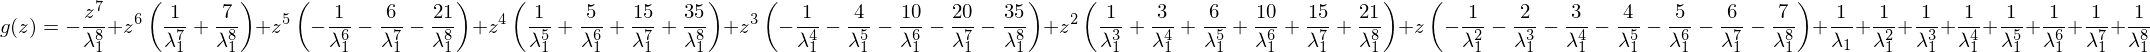

In [32]:
g_inverse = g_poly(f_inverse, eigendata, Phi_polynomials)
g_inverse

In [33]:
g_inverse = g_inverse.subs(eigenvals)
g_inverse

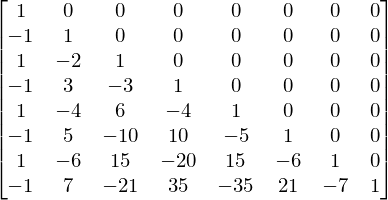

In [34]:
with lift_to_matrix_function(g_inverse) as G_inverse:
    P_inverse = G_inverse(P.rhs)
P_inverse

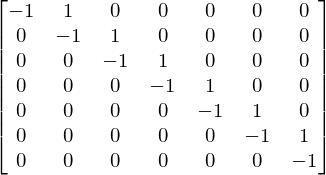

In [35]:
production_matrix(P_inverse)

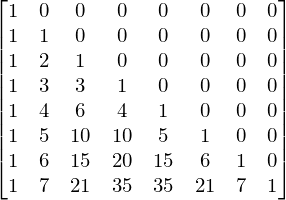

In [16]:
g_inverse(P_inverse)

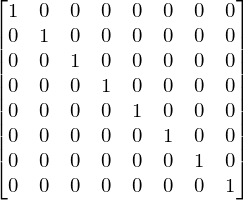

In [19]:
(P_inverse * P).doit()

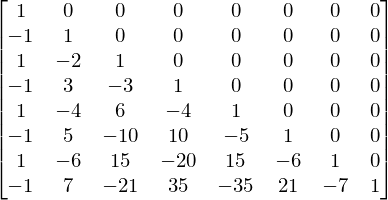

In [22]:
(P**(-1)).doit()

## `power` function

In [151]:
f = Function('f')
f_power = define(let=f(z), be=z**r)
f_power

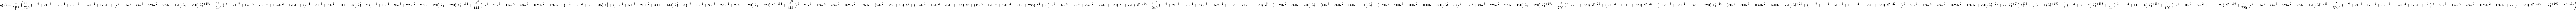

In [152]:
g_power = g_poly(f_power, eigendata, Phi_polynomials)
g_power.simplify()

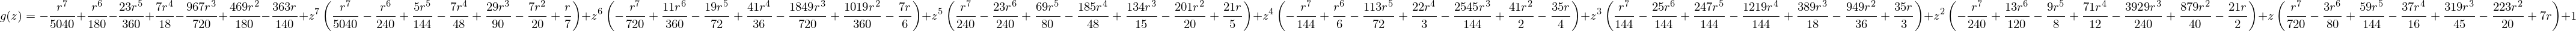

In [116]:
g_power = g_power.subs(eigenvals)
g_power

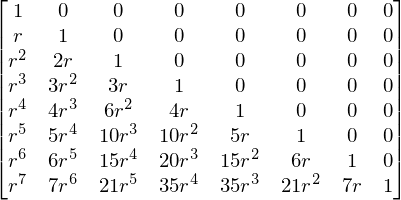

In [117]:
with lift_to_matrix_function(g_power) as g_power:
    m_power = g_power(P)
m_power

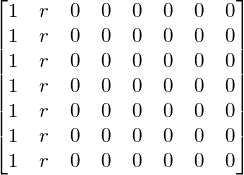

In [118]:
Asequence(m_power)

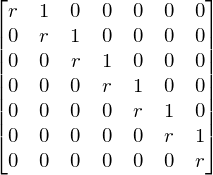

In [119]:
production_matrix(m_power)

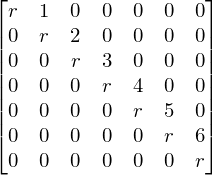

In [120]:
production_matrix(m_power, exp=True)

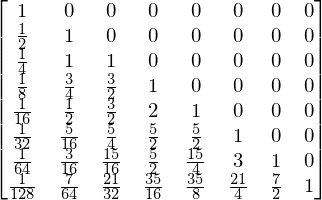

In [121]:
m_power.subs({r:S(1)/2})

## `sqrt` function

In [33]:
f = Function('f')
f_sqrt = define(let=f(z), be=sqrt(z))
f_sqrt

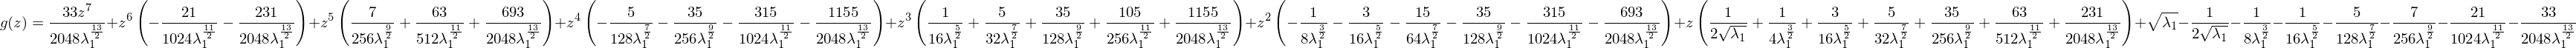

In [34]:
g_sqrt = g_poly(f_sqrt, eigendata, Phi_polynomials)
g_sqrt

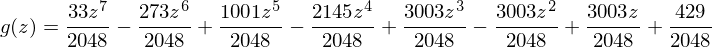

In [35]:
g_sqrt = g_sqrt.subs(eigenvals)
g_sqrt

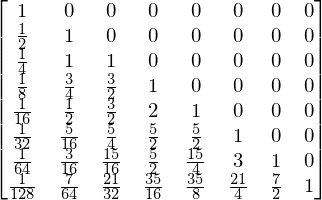

In [36]:
with lift_to_matrix_function(g_sqrt) as g_sqrt:
    m_sqrt = g_sqrt(P)
m_sqrt

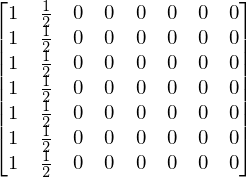

In [37]:
Asequence(m_sqrt)

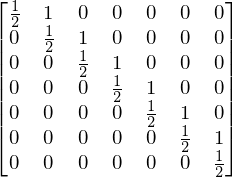

In [38]:
production_matrix(m_sqrt)

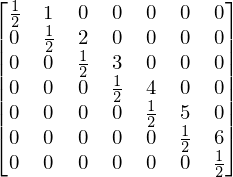

In [39]:
production_matrix(m_sqrt, exp=True)

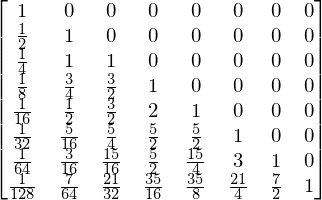

In [30]:
P**(S(1)/2)

## `expt` function

In [40]:
f = Function('f')
f_expt = define(let=f(z), be=exp(alpha*z))
f_expt

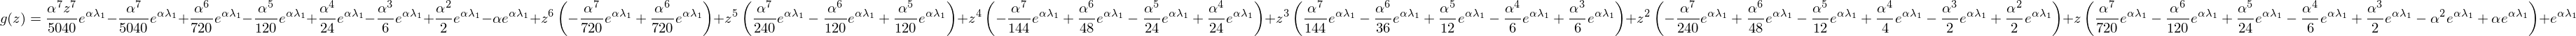

In [41]:
g_expt = g_poly(f_expt, eigendata, Phi_polynomials)
g_expt

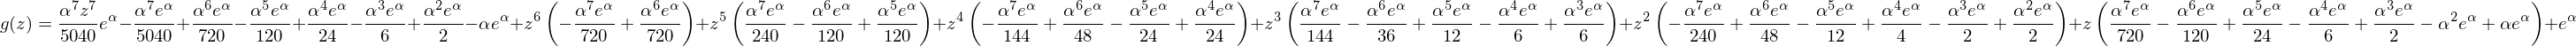

In [42]:
g_expt = g_expt.subs(eigenvals)
g_expt

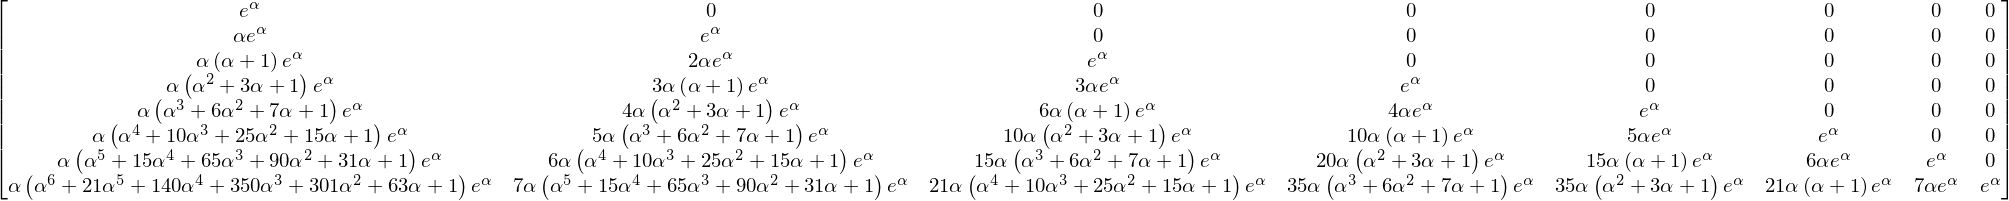

In [43]:
with lift_to_matrix_function(g_expt) as g_expt:
    P_expt = g_expt(P)
P_expt

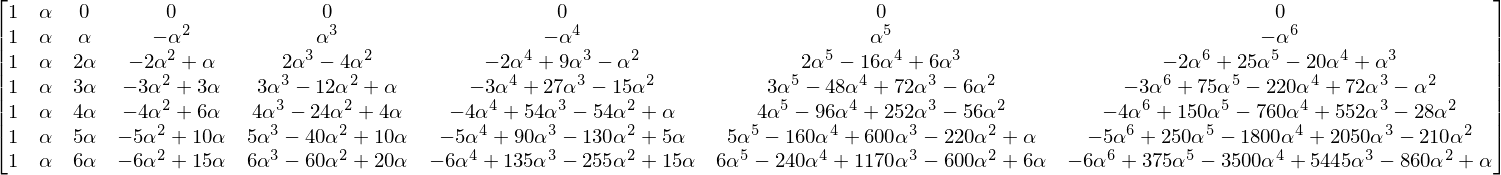

In [44]:
Asequence(P_expt)

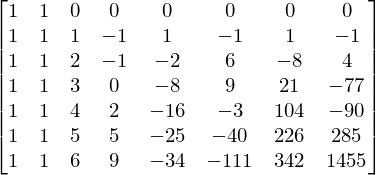

In [45]:
_.subs({alpha:1})

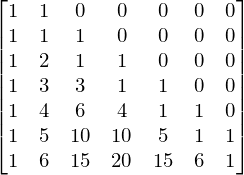

In [48]:
production_matrix(P_expt).subs({alpha:1})

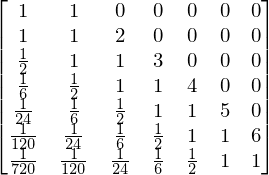

In [49]:
production_matrix(P_expt, exp=True).subs({alpha:1})

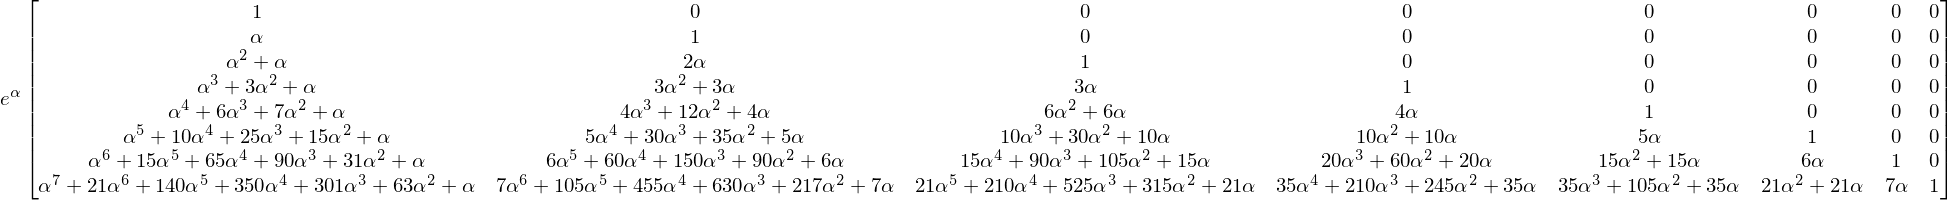

In [50]:
simp_P_expt = Mul(exp(alpha), P_expt.applyfunc(lambda c: (c/exp(alpha)).expand()), evaluate=False)
simp_P_expt

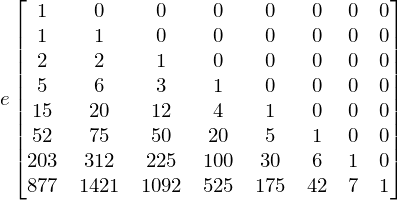

In [51]:
simp_P_expt.subs({alpha:1})

In [52]:
from sympy.functions.combinatorial.numbers import stirling

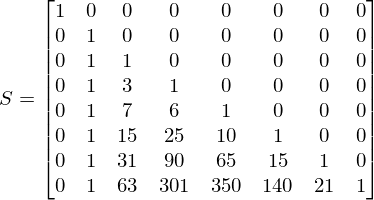

In [53]:
S = Matrix(m, m, lambda n,k: stirling(n,k, kind=2))
Eq(Symbol('S'), S, evaluate=False)

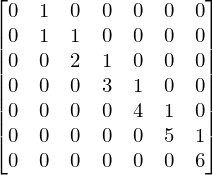

In [54]:
production_matrix(S)

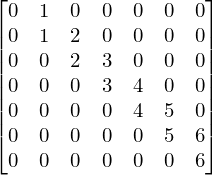

In [55]:
production_matrix(S, exp=True)

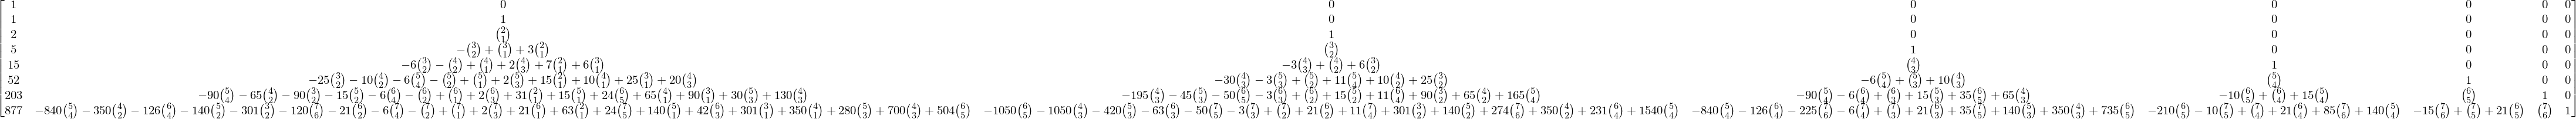

In [56]:
S*P*S**(-1)

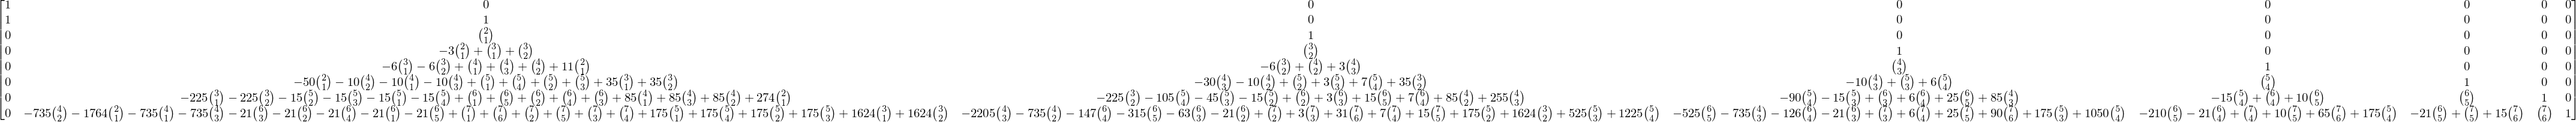

In [57]:
S**(-1)*P*S

### Exercise 5.6

In [7]:
d = IndexedBase('d')
h = IndexedBase('h')

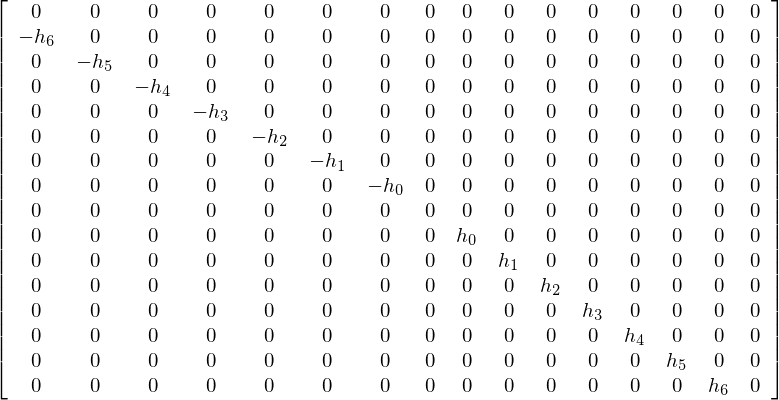

In [47]:
m = 16
H = Matrix(m, m, lambda n, k: 0 if n==m/2 or n!=k+1 else -h[-(k-(m/S(2))+2)] if n<m/2 else h[k-(m/S(2))])
H

In [48]:
f = Function('f')
alpha, beta, gamma = symbols(r'\alpha \beta \gamma')
f_expt = define(let=f(z), be=exp(z))
f_expt

In [49]:
data, eigenvals, multiplicities = eigendata = eigen_data(H)
eigendata

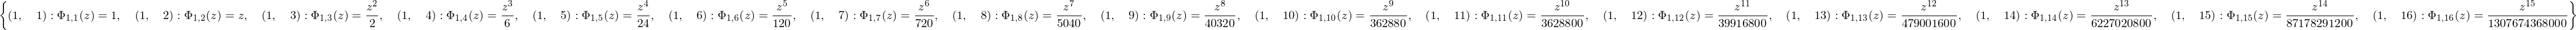

In [50]:
Phi_polynomials = component_polynomials(eigendata, early_eigenvals_subs=True)
Phi_polynomials

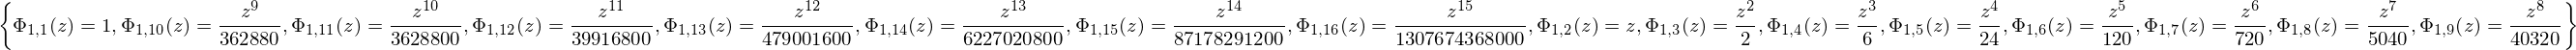

In [42]:
{poly_def.subs(eigenvals) for (i,j), poly_def in Phi_polynomials.items()}

In [51]:
g_expt = g_poly(f_expt, eigendata, Phi_polynomials)
#g_expt

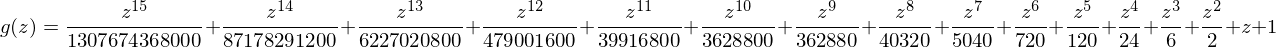

In [52]:
g_expt = g_expt.subs(eigenvals)
g_expt

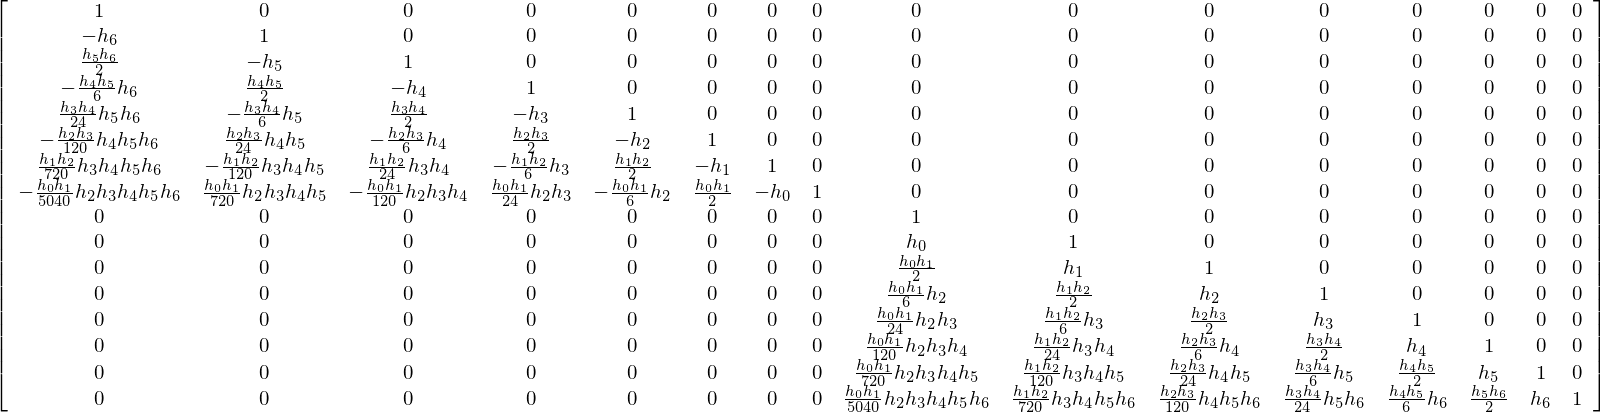

In [53]:
with lift_to_matrix_function(g_expt) as g_expt:
    H_expt = g_expt(H)
H_expt

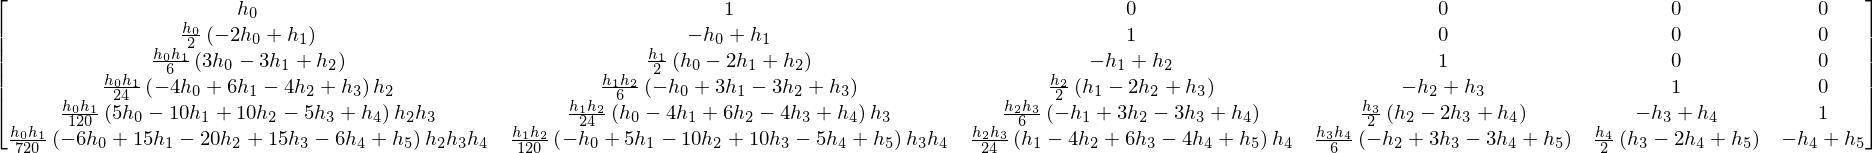

In [28]:
production_matrix(H_expt[7:,7:])

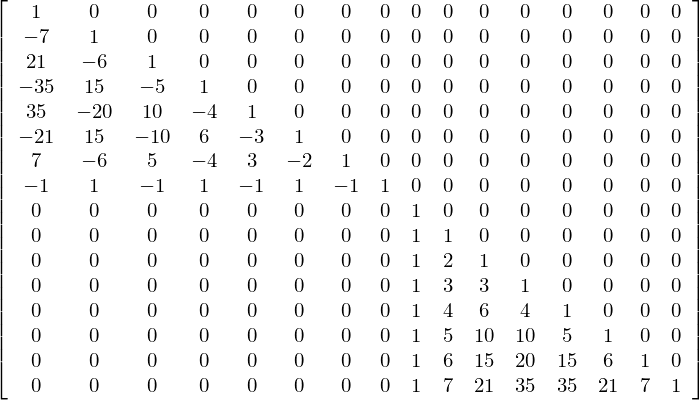

In [54]:
H_expt.subs({h[0]:1,h[1]:2,h[2]:3, h[3]:4,h[4]:5,h[5]:6,h[6]:7})

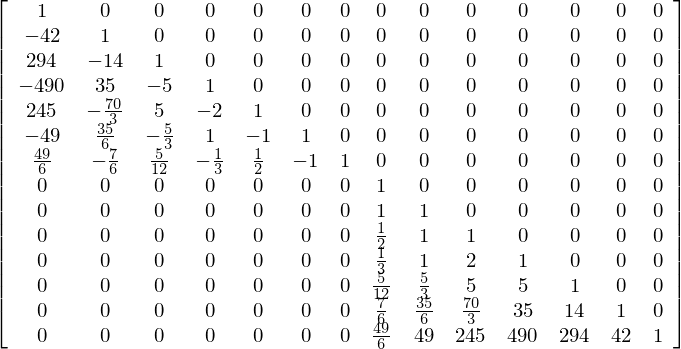

In [26]:
H_expt.subs({h[0]:1,h[1]:1,h[2]:2, h[3]:5,h[4]:14,h[5]:42})

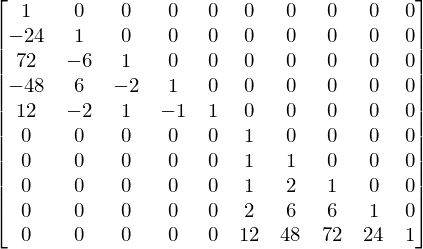

In [11]:
H_expt.subs({h[0]:factorial(1),h[1]:factorial(2),h[2]:factorial(3), h[3]:factorial(4),h[4]:factorial(5)})

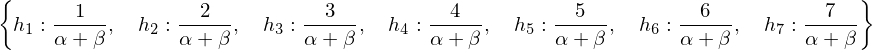

In [66]:
constraints = [Eq(H_expt[n,k],P[n,k]) for n in range(m) for k in range(n)]
sol, *rest = solve(constraints,  [h[i] for i in range(1,m)], dict=True)
sol

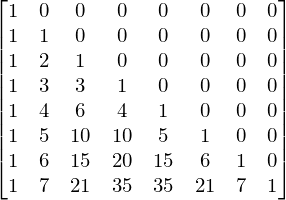

In [68]:
H_expt.subs(sol).applyfunc(simplify)

In [24]:
{i:factorial(i, ) for i in range(11)}

## `log` function

In [46]:
f = Function('f')
f_log = define(let=f(z), be=log(z))
f_log

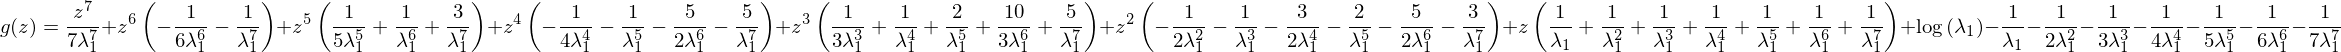

In [47]:
g_log = g_poly(f_log, eigendata, Phi_polynomials)
g_log

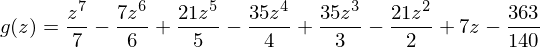

In [48]:
g_log = g_log.subs(eigenvals)
g_log

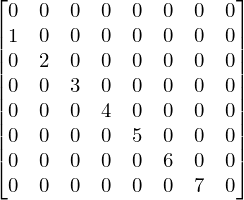

In [49]:
with lift_to_matrix_function(g_log) as g_log:
    P_log = g_log(P)
P_log

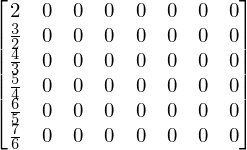

In [51]:
Asequence(P_log[1:,:])

## `sin` function

In [36]:
f = Function('f')
f_sin = define(let=f(z), be=sin(z))
f_sin

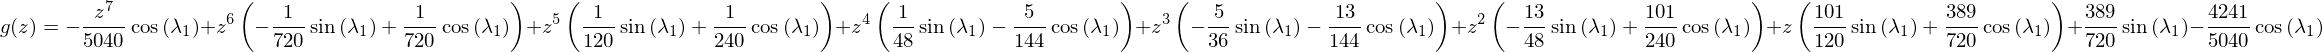

In [37]:
g_sin = g_poly(f_sin, eigendata, Phi_polynomials)
g_sin

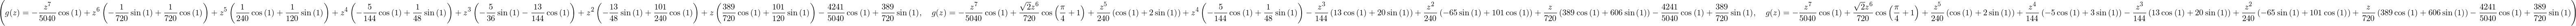

In [138]:
g_sin = g_sin.subs(eigenvals)
g_sin, g_sin.trigsimp(), g_sin.simplify()

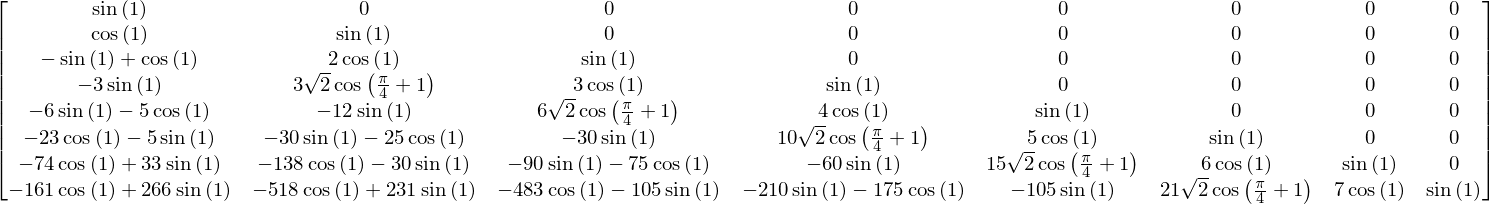

In [40]:
with lift_to_matrix_function(g_sin) as g_sin_fn:
    P_sin = g_sin_fn(P.rhs).applyfunc(simplify)
    
P_sin.subs(eigenvals)

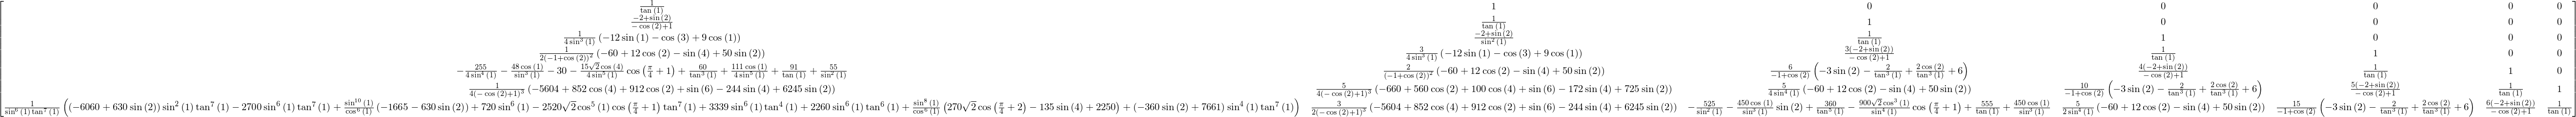

In [141]:
production_matrix(P_sin).applyfunc(simplify)

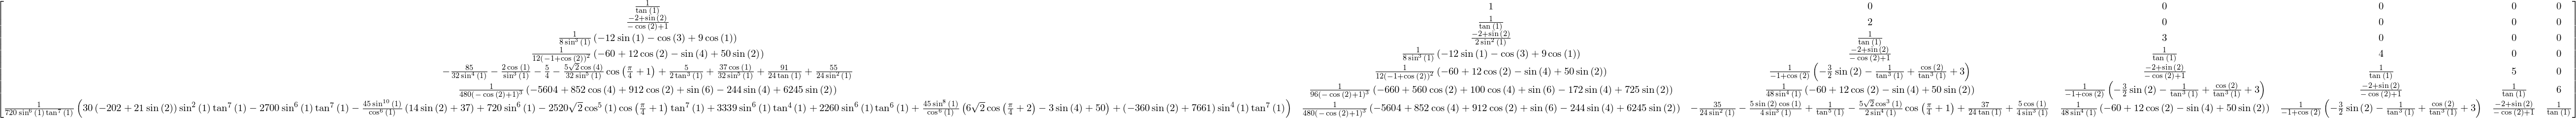

In [142]:
production_matrix(P_sin, exp=True).applyfunc(simplify)

## `cos` function

In [41]:
f = Function('f')
f_cos = define(let=f(z), be=cos(z))
f_cos

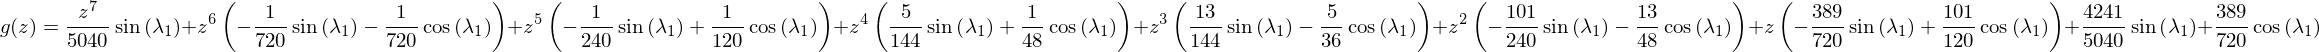

In [42]:
g_cos = g_poly(f_cos, eigendata, Phi_polynomials)
g_cos

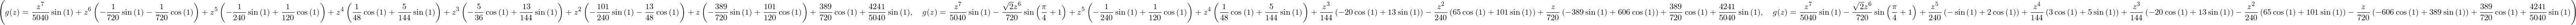

In [43]:
g_cos = g_cos.subs(eigenvals)
g_cos, g_cos.trigsimp(), g_cos.simplify()

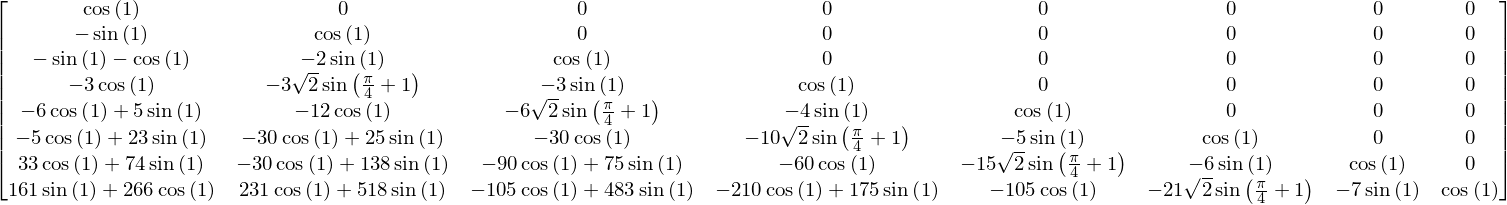

In [44]:
with lift_to_matrix_function(g_cos) as g_cos_fn:
    P_cos = g_cos_fn(P.rhs).applyfunc(simplify)
    
P_cos

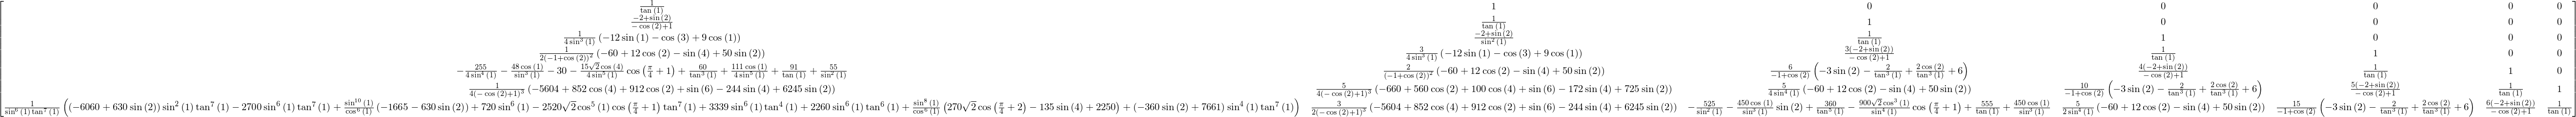

In [147]:
production_matrix(P_sin).applyfunc(simplify)

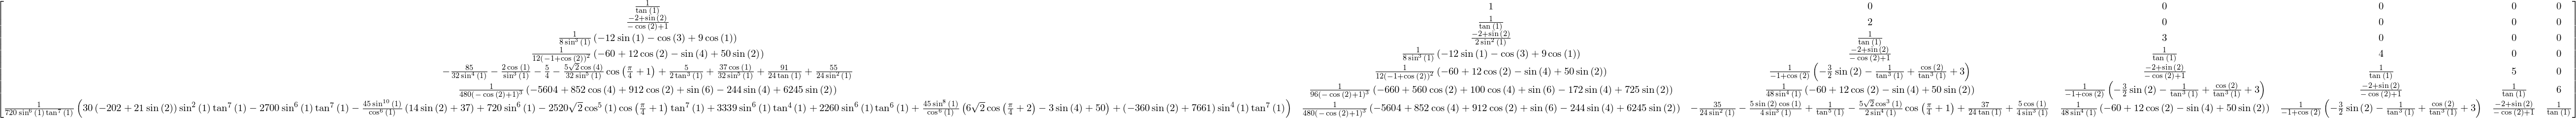

In [142]:
production_matrix(P_sin, exp=True).applyfunc(simplify)

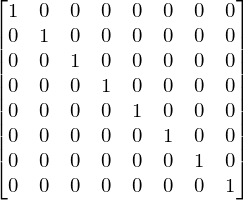

In [149]:
(P_sin**2 + P_cos**2).applyfunc(trigsimp)

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.